# Practical: Employee Attrition

### About Dataset

#### Context

The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. You ar going to help.

#### Content

I have data about past and current employees in a .csv file. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition. For instance, which factors led to employee attrition?

<B>Education</B>
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

<B>EnvironmentSatisfaction</B>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

<B>JobInvolvement</B>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

<B>JobSatisfaction</B>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

<B>PerformanceRating</B>
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

<B>RelationshipSatisfaction</B>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

<B>WorkLifeBalance</B>
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## 1 - problem statement

Start by writing a problem statement: what is the practical  issue that you want to address and why does it matter?



- Employees retention in companies is an important factor for the company to thrive and run its business smoothly without disruptions from employees quitting. 
- from personal experience, it has been observed that finding and onboarding a replacement employees is time consuming and disruptive

## 2 - Research questions 

Next, formulate one or more research questions that precisely define what you want to find out. 

- what are the characteristics of employees who are planning to leave a company? 

#### Some potential research questions

- What are the main reasons for employee attrition in the organization?
- **How does employee satisfaction level relate to their decision to stay or leave the company?**
- What is the correlation between employee compensation and retention rates?
- How do employee career growth opportunities affect their decision to stay or leave the company?
- Does the length of an employee's tenure with the company influence their likelihood of leaving?
- What role does the employee's manager or supervisor play in their decision to stay or leave the company?
- How does the organization's culture and values impact employee retention rates?
- What is the impact of employee workload and job stress on their decision to stay or leave the company?
- Are there any significant differences in retention rates between different departments within the organization? If so, what - factors contribute to these differences?
- What is the effect of the company's training and development programs on employee retention rates?

## 3 - Exploratory Data Analysis.  

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sst


In [2]:
df = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().any().any() # no null values in the dataframe

False

## Apply Descriptive Staticstics: 
Describe the following characteristics of the observations: 

    1) The distribution concerns the frequency of each value.
    
    2) The central tendency concerns the averages of the values.
    
    3) The variability or dispersion concerns how spread out the values 

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot: xlabel='Age', ylabel='Density'>

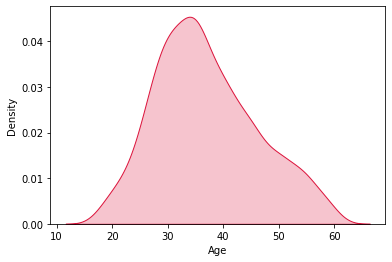

In [7]:
sns.kdeplot(df["Age"], fill=True, color='crimson')

<AxesSubplot: ylabel='Attrition'>

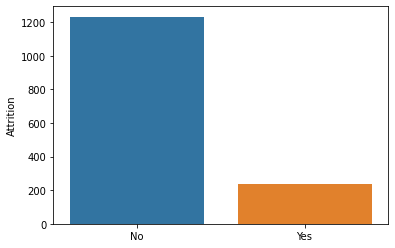

In [8]:
sns.barplot(x=df["Attrition"].value_counts().index, y=df["Attrition"].value_counts())


<AxesSubplot: xlabel='Attrition', ylabel='count'>

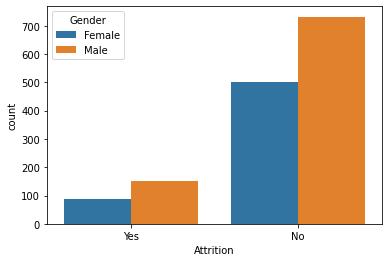

In [9]:
sns.countplot(x='Attrition', hue='Gender', data=df)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

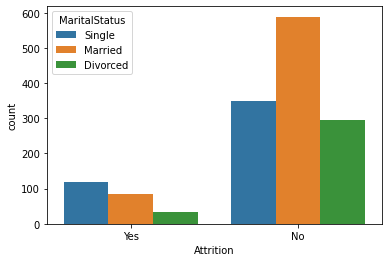

In [10]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=df)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

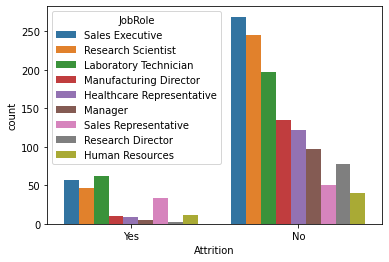

In [11]:
sns.countplot(x='Attrition', hue='JobRole', data=df)

It appears that "Sales Representative" has the highest ratio of employees leaving compared to any other role

<AxesSubplot: xlabel='Attrition', ylabel='count'>

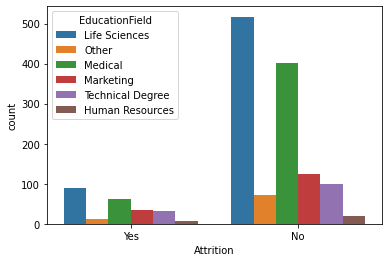

In [12]:
sns.countplot(x='Attrition', hue='EducationField', data=df)

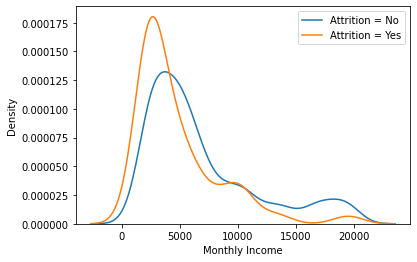

In [13]:
# Kernel density plot of numerical columns
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label='Attrition = No')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label='Attrition = Yes')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend()
plt.show()


Employees with lower income are more likely to leave compared to employees with higher income

/tmp/ipykernel_2042/939222549.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


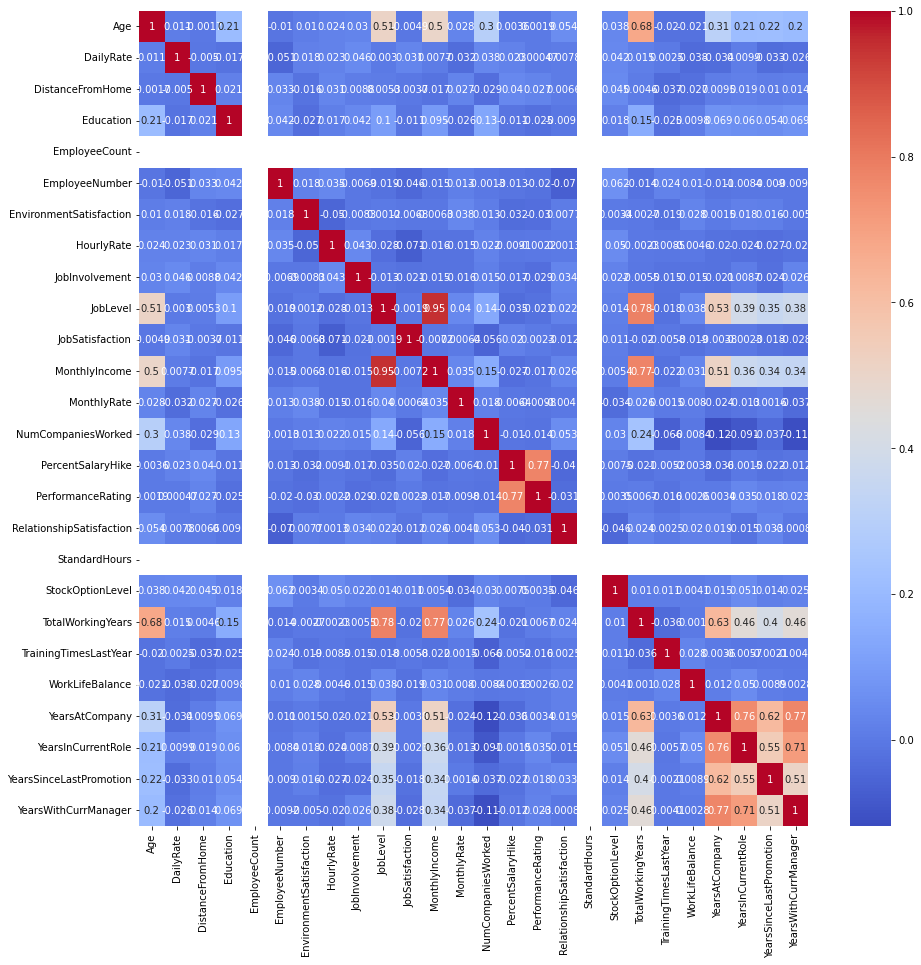

In [14]:
# Create a correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

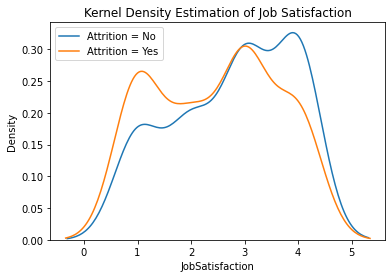

In [15]:
# df["JobSatisfaction"].value_counts()

# Kernel density plot of numerical columns
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'JobSatisfaction'], label='Attrition = No', bw_method=0.4)
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'JobSatisfaction'], label='Attrition = Yes', bw_method=0.4)
plt.xlabel('JobSatisfaction')
plt.ylabel('Density')
plt.legend()
plt.title("Kernel Density Estimation of Job Satisfaction")
plt.show()

we observe that employees with job satisfaction value lower than 3 are more likely to leave their jobs compared to the employees with job satisfaction of 4+ 

In [41]:

sst.ttest_ind(df[df["Attrition"] == "No"]["JobSatisfaction"], 
              df[df["Attrition"] == "Yes"]["JobSatisfaction"], equal_var = True)

Ttest_indResult(statistic=3.9862267630568273, pvalue=7.04306674173115e-05)

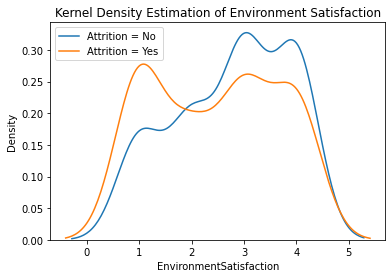

In [16]:
# Kernel density plot of numerical columns
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'EnvironmentSatisfaction'], label='Attrition = No', bw_method=0.4)
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'EnvironmentSatisfaction'], label='Attrition = Yes', bw_method=0.4)
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Density')
plt.legend()
plt.title("Kernel Density Estimation of Environment Satisfaction")
plt.show()

we observe that employees with environment satisfaction value lower than 2 are more likely to leave their jobs compared to the employees with environment satisfaction of 2+ 

In [35]:

sst.ttest_ind(df[df["Attrition"] == "No"]["EnvironmentSatisfaction"], 
              df[df["Attrition"] == "Yes"]["EnvironmentSatisfaction"], equal_var = True)

Ttest_indResult(statistic=3.9818600026818496, pvalue=7.17233854936886e-05)

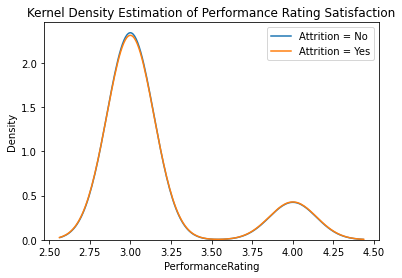

In [17]:

# Kernel density plot of numerical columns
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'PerformanceRating'], label='Attrition = No', bw_method=0.4)
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'PerformanceRating'], label='Attrition = Yes', bw_method=0.4)
plt.xlabel('PerformanceRating')
plt.ylabel('Density')
plt.legend()
plt.title("Kernel Density Estimation of Performance Rating Satisfaction")
plt.show()

In [40]:

sst.ttest_ind(df[df["Attrition"] == "No"]["PerformanceRating"], 
              df[df["Attrition"] == "Yes"]["PerformanceRating"], equal_var = True)

Ttest_indResult(statistic=-0.11068150493295092, pvalue=0.9118840421069003)

## Apply Inferential Staticstics:

Obtain insights from the data using inferential techniques for analyzing  including:

 - Hypothesis testing
 - Confidence intervals
 - Regression and correlation analysis

In [18]:
# df.corrwith(df["Attrition"].map({"Yes":1, "No":0}))
df.corrwith(df["JobLevel"])

/tmp/ipykernel_2042/393946103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["JobLevel"])


Age                         0.509604
DailyRate                   0.002966
DistanceFromHome            0.005303
Education                   0.101589
EmployeeCount                    NaN
EmployeeNumber             -0.018519
EnvironmentSatisfaction     0.001212
HourlyRate                 -0.027853
JobInvolvement             -0.012630
JobLevel                    1.000000
JobSatisfaction            -0.001944
MonthlyIncome               0.950300
MonthlyRate                 0.039563
NumCompaniesWorked          0.142501
PercentSalaryHike          -0.034730
PerformanceRating          -0.021222
RelationshipSatisfaction    0.021642
StandardHours                    NaN
StockOptionLevel            0.013984
TotalWorkingYears           0.782208
TrainingTimesLastYear      -0.018191
WorkLifeBalance             0.037818
YearsAtCompany              0.534739
YearsInCurrentRole          0.389447
YearsSinceLastPromotion     0.353885
YearsWithCurrManager        0.375281
dtype: float64

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

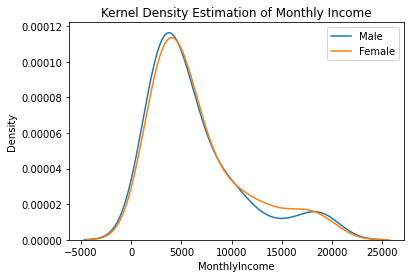

In [27]:

# Kernel density plot of numerical columns
sns.kdeplot(df.loc[df['Gender'] == 'Male', 'MonthlyIncome'], label='Male', bw_method=0.4)
sns.kdeplot(df.loc[df['Gender'] == 'Female', 'MonthlyIncome'], label='Female', bw_method=0.4)
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')
plt.legend()
plt.title("Kernel Density Estimation of Monthly Income")
plt.show()

In [33]:

sst.ttest_ind(df[df["Gender"] == "Male"]["MonthlyIncome"], 
              df[df["Gender"] == "Female"]["MonthlyIncome"], equal_var = True)

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)

P-Value >> 0.05

We fail to reject the null hypotheses.
therefore, there is no significant difference between Male and Female monthly income 